<div class="alert alert-block alert-success">
    <h1 align="center">Classification of naloxone injection hours  </h1>
    <h3 align="center">Investigating the relationship between patient variables and drip hours naloxone  </h3>
</div>

 <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #01030E; text-align: center; line-height: 1.25;"><b> Naloxone Project_Stage 1 <span style="color: #000000"> 💹</span></b><br><span style="color: #8CB743; font-size: 24px"> Prediction of naloxone dose in opioids toxicity based on machine learning techniques (artificial intelligence)

</span></h1>

<hr>

# <div style="font-family: Trebuchet MS; background-color: #568203; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Installing and Importing Libraries 📚</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Installing</b> naloxlib & other libraries and <b>importing them</b> to be used in this notebook.
</div>
👉  <b>naloxlib libraries</b> was created specifically for this project.
</div>

In [1]:
import naloxlib
from naloxlib.classifier import *

In [3]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import cloudpickle
import imblearn.pipeline
import scikitplot as skplt  
import os
import glob
import warnings
import pandas as pd
import plotly.express as px
import sklearn
import tqdm.notebook
import tqdm.std
import xxhash
from matplotlib.dates import DateFormatter
from joblib.memory import Memory
from scipy.optimize import shgo
from joblib.memory import Memory
from yellowbrick.utils.helpers import get_model_name as get_model_name_original
from category_encoders.basen import BaseNEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder
from scipy import interp

warnings.filterwarnings('ignore')
%matplotlib inline


# <div style="font-family: Trebuchet MS; background-color: #568203; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Reading Dataset 👓</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 After importing libraries, <b>the dataset that will be used will be imported</b>.
</div>

## Load

In [6]:
#Let's Read Microsoft Excel file 
#Show some records of dataframe
data_Total = pd.read_excel("/Users/salio/Desktop/SalioL/Chief_data_naloxan_ForClassification.xlsx")
data_Total.sample(4)

,Unnamed: 0,Sex,Age,time_duration,CoIngestion,GCS,sign,RR,SBP,DBP,...,CPK,PT,PTT,INR,Bullos.Of.Naloxan,Total_Naloxan,Class_Hours_Naloxan,Hours_Of_Naloxan,aspirationPneomonia,ICU
83,15,0,15,22.0,0,15,0,22,122,87,...,299,13.6,24.9,1.17,0.2,0.0,Less than 24 hours,0.0,1,1
170,14,1,42,4.0,1,14,2,12,110,70,...,207,14.5,33.6,1.30,0.4,0.0,Less than 24 hours,0.0,0,0
65,207,0,49,4.5,0,9,4,10,120,80,...,124,14.5,33.6,1.30,1.2,28.8,more than 24 hours,48.0,0,0
139,73,1,30,22.0,0,10,1,16,100,50,...,238,12.0,33.0,1.20,2.8,3.0,Less than 24 hours,3.0,1,0


In [5]:
data_sel = data_Total.drop(["Unnamed: 0","Hours_Of_Naloxan","Total_Naloxan"],axis = 1)
data_sel.head()

,Sex,Age,time_duration,CoIngestion,GCS,sign,RR,SBP,DBP,PR,...,ALP,LDH,CPK,PT,PTT,INR,Bullos.Of.Naloxan,Class_Hours_Naloxan,aspirationPneomonia,ICU
0,1,12,4.0,0,8,4,9,120,80,130,...,169.0,450.0,480,14.5,33.6,1.30,2.0,more than 24 hours,0,0
1,1,12,1.0,0,13,1,12,125,65,90,...,338.0,468.0,480,14.7,31.8,1.25,0.8,more than 24 hours,0,0
2,1,14,2.0,0,14,1,12,125,65,90,...,338.0,467.0,480,14.7,31.8,1.25,0.8,more than 24 hours,0,0
3,1,14,3.5,1,10,1,7,100,65,80,...,152.0,441.0,255,13.0,23.8,1.09,0.8,more than 24 hours,0,0
4,1,15,6.0,0,8,4,9,85,50,100,...,194.0,450.0,480,13.5,28.4,1.14,2.0,more than 24 hours,1,1


In [6]:
data_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  221 non-null    int64  
 1   Age                  221 non-null    int64  
 2   time_duration        221 non-null    float64
 3   CoIngestion          221 non-null    int64  
 4   GCS                  221 non-null    int64  
 5   sign                 221 non-null    int64  
 6   RR                   221 non-null    int64  
 7   SBP                  221 non-null    int64  
 8   DBP                  221 non-null    int64  
 9   PR                   221 non-null    int64  
 10  T                    221 non-null    float64
 11  PH                   221 non-null    float64
 12  pCO2                 221 non-null    float64
 13  HCO3                 221 non-null    float64
 14  WBC                  221 non-null    float64
 15  Hb                   221 non-null    flo

# <div style="font-family: Trebuchet MS; background-color: #568203; color: #FFFFFF; padding: 12px; line-height: 1.5;">  build_naloxone_model for classification ⚙</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will <b>implement</b> the naloxlib library.<br>
    👉 In addition, this section will also <b>do some experiments</b>, including creating another models from the module 


In [7]:
build_naloxone_model(data=data_sel,session_id=123,train_size = 0.7)

,Information,Value
0,Outcome,Class_Hours_Naloxan
1,Encoding,"Less than 24 hours: 0, more than 24 hours: 1"
2,Dataset shape,"(221, 34)"
3,Train_set shape,"(154, 34)"
4,Test_set shape,"(67, 34)"
5,Fold Generator,StratifiedKFold
6,Fold Number,10


## <div style="font-family: Trebuchet MS; background-color: #8CB743; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Comparing All Models 🔭</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b><code>Comparison of models</code></b> will be used to <b>evaluate all models performance</b> after all models successfully running. In the table will show the <b>Accuracy, AUC, Recall, Precision </b> score of each models. It also show total of time (in sec) needed to execute the models.<br>
    👉 For this experiment, <b>Prediction Test Data </b> will be used to evaluate the model.
</div>

In [ ]:
Classifier_comparison_naloxone()

<style type="text/css">
#T_d0a9e th {
  text-align: left;
}
#T_d0a9e_row0_col0, #T_d0a9e_row0_col2, #T_d0a9e_row1_col0, #T_d0a9e_row1_col1, #T_d0a9e_row1_col3, #T_d0a9e_row1_col4, #T_d0a9e_row1_col5, #T_d0a9e_row1_col6, #T_d0a9e_row1_col7, #T_d0a9e_row2_col0, #T_d0a9e_row2_col1, #T_d0a9e_row2_col2, #T_d0a9e_row2_col3, #T_d0a9e_row2_col4, #T_d0a9e_row2_col5, #T_d0a9e_row2_col6, #T_d0a9e_row2_col7, #T_d0a9e_row3_col0, #T_d0a9e_row3_col1, #T_d0a9e_row3_col2, #T_d0a9e_row3_col3, #T_d0a9e_row3_col4, #T_d0a9e_row3_col5, #T_d0a9e_row3_col6, #T_d0a9e_row3_col7, #T_d0a9e_row4_col0, #T_d0a9e_row4_col1, #T_d0a9e_row4_col2, #T_d0a9e_row4_col3, #T_d0a9e_row4_col4, #T_d0a9e_row4_col5, #T_d0a9e_row4_col6, #T_d0a9e_row4_col7, #T_d0a9e_row5_col0, #T_d0a9e_row5_col1, #T_d0a9e_row5_col2, #T_d0a9e_row5_col3, #T_d0a9e_row5_col4, #T_d0a9e_row5_col5, #T_d0a9e_row5_col6, #T_d0a9e_row5_col7, #T_d0a9e_row6_col0, #T_d0a9e_row6_col1, #T_d0a9e_row6_col2, #T_d0a9e_row6_col3, #T_d0a9e_row6_col4, #T_d0a9e_row6_col5, #T_d0a9e_row6_col6, #T_d0a9e_row6_col7, #T_d0a9e_row7_col0, #T_d0a9e_row7_col1, #T_d0a9e_row7_col2, #T_d0a9e_row7_col3, #T_d0a9e_row7_col4, #T_d0a9e_row7_col5, #T_d0a9e_row7_col6, #T_d0a9e_row7_col7, #T_d0a9e_row8_col0, #T_d0a9e_row8_col1, #T_d0a9e_row8_col2, #T_d0a9e_row8_col3, #T_d0a9e_row8_col4, #T_d0a9e_row8_col5, #T_d0a9e_row8_col6, #T_d0a9e_row8_col7, #T_d0a9e_row9_col0, #T_d0a9e_row9_col1, #T_d0a9e_row9_col2, #T_d0a9e_row9_col3, #T_d0a9e_row9_col4, #T_d0a9e_row9_col5, #T_d0a9e_row9_col6, #T_d0a9e_row9_col7, #T_d0a9e_row10_col0, #T_d0a9e_row10_col1, #T_d0a9e_row10_col2, #T_d0a9e_row10_col3, #T_d0a9e_row10_col4, #T_d0a9e_row10_col5, #T_d0a9e_row10_col6, #T_d0a9e_row10_col7, #T_d0a9e_row11_col0, #T_d0a9e_row11_col1, #T_d0a9e_row11_col2, #T_d0a9e_row11_col3, #T_d0a9e_row11_col4, #T_d0a9e_row11_col5, #T_d0a9e_row11_col6, #T_d0a9e_row11_col7, #T_d0a9e_row12_col0, #T_d0a9e_row12_col1, #T_d0a9e_row12_col2, #T_d0a9e_row12_col3, #T_d0a9e_row12_col4, #T_d0a9e_row12_col5, #T_d0a9e_row12_col6, #T_d0a9e_row12_col7, #T_d0a9e_row13_col0, #T_d0a9e_row13_col1, #T_d0a9e_row13_col2, #T_d0a9e_row13_col3, #T_d0a9e_row13_col4, #T_d0a9e_row13_col5, #T_d0a9e_row13_col6, #T_d0a9e_row13_col7, #T_d0a9e_row14_col0, #T_d0a9e_row14_col1, #T_d0a9e_row14_col2, #T_d0a9e_row14_col3, #T_d0a9e_row14_col4, #T_d0a9e_row14_col5, #T_d0a9e_row14_col6, #T_d0a9e_row14_col7 {
  text-align: left;
}
#T_d0a9e_row0_col1, #T_d0a9e_row0_col3, #T_d0a9e_row0_col4, #T_d0a9e_row0_col5, #T_d0a9e_row0_col6, #T_d0a9e_row0_col7, #T_d0a9e_row1_col2 {
  text-align: left;
  background-color: yellow;
}
#T_d0a9e_row0_col8, #T_d0a9e_row1_col8, #T_d0a9e_row2_col8, #T_d0a9e_row3_col8, #T_d0a9e_row4_col8, #T_d0a9e_row5_col8, #T_d0a9e_row6_col8, #T_d0a9e_row7_col8, #T_d0a9e_row8_col8, #T_d0a9e_row9_col8, #T_d0a9e_row10_col8, #T_d0a9e_row11_col8, #T_d0a9e_row13_col8, #T_d0a9e_row14_col8 {
  text-align: left;
  background-color: lightgrey;
}
#T_d0a9e_row12_col8 {
  text-align: left;
  background-color: yellow;
  background-color: lightgrey;
}
</style>
<table id="T_d0a9e" class="dataframe">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_d0a9e_level0_col0" class="col_heading level0 col0" >Model</th>
      <th id="T_d0a9e_level0_col1" class="col_heading level0 col1" >Accuracy</th>
      <th id="T_d0a9e_level0_col2" class="col_heading level0 col2" >AUC</th>
      <th id="T_d0a9e_level0_col3" class="col_heading level0 col3" >Recall</th>
      <th id="T_d0a9e_level0_col4" class="col_heading level0 col4" >Prec.</th>
      <th id="T_d0a9e_level0_col5" class="col_heading level0 col5" >F1</th>
      <th id="T_d0a9e_level0_col6" class="col_heading level0 col6" >Kappa</th>
      <th id="T_d0a9e_level0_col7" class="col_heading level0 col7" >MCC</th>
      <th id="T_d0a9e_level0_col8" class="col_heading level0 col8" >TT (Sec)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_d0a9e_level0_row0" class="row_heading level0 row0" >lightgbm</th>
      <td id="T_d0a9e_row0_col0" class="data row0 col0" >Light Gradient Boosting Machine</td>
      <td id="T_d0a9e_row0_col1" class="data row0 col1" >0.9300</td>
      <td id="T_d0a9e_row0_col2" class="data row0 col2" >0.9860</td>
      <td id="T_d0a9e_row0_col3" class="data row0 col3" >0.9300</td>
      <td id="T_d0a9e_row0_col4" class="data row0 col4" >0.9382</td>
      <td id="T_d0a9e_row0_col5" class="data row0 col5" >0.9299</td>
      <td id="T_d0a9e_row0_col6" class="data row0 col6" >0.8523</td>
      <td id="T_d0a9e_row0_col7" class="data row0 col7" >0.8601</td>
      <td id="T_d0a9e_row0_col8" class="data row0 col8" >0.3210</td>
    </tr>
    <tr>
      <th id="T_d0a9e_level0_row1" class="row_heading level0 row1" >xgboost</th>
      <td id="T_d0a9e_row1_col0" class="data row1 col0" >Extreme Gradient Boosting</td>
      <td id="T_d0a9e_row1_col1" class="data row1 col1" >0.9292</td>
      <td id="T_d0a9e_row1_col2" class="data row1 col2" >0.9893</td>
      <td id="T_d0a9e_row1_col3" class="data row1 col3" >0.9292</td>
      <td id="T_d0a9e_row1_col4" class="data row1 col4" >0.9357</td>
      <td id="T_d0a9e_row1_col5" class="data row1 col5" >0.9288</td>
      <td id="T_d0a9e_row1_col6" class="data row1 col6" >0.8495</td>
      <td id="T_d0a9e_row1_col7" class="data row1 col7" >0.8564</td>
      <td id="T_d0a9e_row1_col8" class="data row1 col8" >0.1440</td>
    </tr>
    <tr>
      <th id="T_d0a9e_level0_row2" class="row_heading level0 row2" >RanForest</th>
      <td id="T_d0a9e_row2_col0" class="data row2 col0" >Random Forest Classifier</td>
      <td id="T_d0a9e_row2_col1" class="data row2 col1" >0.9217</td>
      <td id="T_d0a9e_row2_col2" class="data row2 col2" >0.9840</td>
      <td id="T_d0a9e_row2_col3" class="data row2 col3" >0.9217</td>
      <td id="T_d0a9e_row2_col4" class="data row2 col4" >0.9312</td>
      <td id="T_d0a9e_row2_col5" class="data row2 col5" >0.9204</td>
      <td id="T_d0a9e_row2_col6" class="data row2 col6" >0.8295</td>
      <td id="T_d0a9e_row2_col7" class="data row2 col7" >0.8409</td>
      <td id="T_d0a9e_row2_col8" class="data row2 col8" >0.3680</td>
    </tr>
    <tr>
      <th id="T_d0a9e_level0_row3" class="row_heading level0 row3" >AdaBo</th>
      <td id="T_d0a9e_row3_col0" class="data row3 col0" >Ada Boost Classifier</td>
      <td id="T_d0a9e_row3_col1" class="data row3 col1" >0.9100</td>
      <td id="T_d0a9e_row3_col2" class="data row3 col2" >0.9691</td>
      <td id="T_d0a9e_row3_col3" class="data row3 col3" >0.9100</td>
      <td id="T_d0a9e_row3_col4" class="data row3 col4" >0.9165</td>
      <td id="T_d0a9e_row3_col5" class="data row3 col5" >0.9090</td>
      <td id="T_d0a9e_row3_col6" class="data row3 col6" >0.8046</td>
      <td id="T_d0a9e_row3_col7" class="data row3 col7" >0.8124</td>
      <td id="T_d0a9e_row3_col8" class="data row3 col8" >0.1310</td>
    </tr>
    <tr>
      <th id="T_d0a9e_level0_row4" class="row_heading level0 row4" >EXTre</th>
      <td id="T_d0a9e_row4_col0" class="data row4 col0" >Extra Trees Classifier</td>
      <td id="T_d0a9e_row4_col1" class="data row4 col1" >0.8962</td>
      <td id="T_d0a9e_row4_col2" class="data row4 col2" >0.9768</td>
      <td id="T_d0a9e_row4_col3" class="data row4 col3" >0.8962</td>
      <td id="T_d0a9e_row4_col4" class="data row4 col4" >0.9089</td>
      <td id="T_d0a9e_row4_col5" class="data row4 col5" >0.8950</td>
      <td id="T_d0a9e_row4_col6" class="data row4 col6" >0.7755</td>
      <td id="T_d0a9e_row4_col7" class="data row4 col7" >0.7898</td>
      <td id="T_d0a9e_row4_col8" class="data row4 col8" >0.2420</td>
    </tr>
    <tr>
      <th id="T_d0a9e_level0_row5" class="row_heading level0 row5" >RIG</th>
      <td id="T_d0a9e_row5_col0" class="data row5 col0" >Ridge Classifier</td>
      <td id="T_d0a9e_row5_col1" class="data row5 col1" >0.8908</td>
      <td id="T_d0a9e_row5_col2" class="data row5 col2" >0.0000</td>
      <td id="T_d0a9e_row5_col3" class="data row5 col3" >0.8908</td>
      <td id="T_d0a9e_row5_col4" class="data row5 col4" >0.8999</td>
      <td id="T_d0a9e_row5_col5" class="data row5 col5" >0.8903</td>
      <td id="T_d0a9e_row5_col6" class="data row5 col6" >0.7676</td>
      <td id="T_d0a9e_row5_col7" class="data row5 col7" >0.7763</td>
      <td id="T_d0a9e_row5_col8" class="data row5 col8" >0.0540</td>
    </tr>
    <tr>
      <th id="T_d0a9e_level0_row6" class="row_heading level0 row6" >DT</th>
      <td id="T_d0a9e_row6_col0" class="data row6 col0" >Decision Tree Classifier</td>
      <td id="T_d0a9e_row6_col1" class="data row6 col1" >0.8904</td>
      <td id="T_d0a9e_row6_col2" class="data row6 col2" >0.8811</td>
      <td id="T_d0a9e_row6_col3" class="data row6 col3" >0.8904</td>
      <td id="T_d0a9e_row6_col4" class="data row6 col4" >0.9053</td>
      <td id="T_d0a9e_row6_col5" class="data row6 col5" >0.8876</td>
      <td id="T_d0a9e_row6_col6" class="data row6 col6" >0.7619</td>
      <td id="T_d0a9e_row6_col7" class="data row6 col7" >0.7778</td>
      <td id="T_d0a9e_row6_col8" class="data row6 col8" >0.0610</td>
    </tr>
    <tr>
      <th id="T_d0a9e_level0_row7" class="row_heading level0 row7" >GraBoC</th>
      <td id="T_d0a9e_row7_col0" class="data row7 col0" >Gradient Boosting Classifier</td>
      <td id="T_d0a9e_row7_col1" class="data row7 col1" >0.8904</td>
      <td id="T_d0a9e_row7_col2" class="data row7 col2" >0.9519</td>
      <td id="T_d0a9e_row7_col3" class="data row7 col3" >0.8904</td>
      <td id="T_d0a9e_row7_col4" class="data row7 col4" >0.9085</td>
      <td id="T_d0a9e_row7_col5" class="data row7 col5" >0.8878</td>
      <td id="T_d0a9e_row7_col6" class="data row7 col6" >0.7646</td>
      <td id="T_d0a9e_row7_col7" class="data row7 col7" >0.7832</td>
      <td id="T_d0a9e_row7_col8" class="data row7 col8" >0.1500</td>
    </tr>
    <tr>
      <th id="T_d0a9e_level0_row8" class="row_heading level0 row8" >LogReg</th>
      <td id="T_d0a9e_row8_col0" class="data row8 col0" >Logistic Regression</td>
      <td id="T_d0a9e_row8_col1" class="data row8 col1" >0.8775</td>
      <td id="T_d0a9e_row8_col2" class="data row8 col2" >0.9244</td>
      <td id="T_d0a9e_row8_col3" class="data row8 col3" >0.8775</td>
      <td id="T_d0a9e_row8_col4" class="data row8 col4" >0.8855</td>
      <td id="T_d0a9e_row8_col5" class="data row8 col5" >0.8766</td>
      <td id="T_d0a9e_row8_col6" class="data row8 col6" >0.7377</td>
      <td id="T_d0a9e_row8_col7" class="data row8 col7" >0.7460</td>
      <td id="T_d0a9e_row8_col8" class="data row8 col8" >0.8310</td>
    </tr>
    <tr>
      <th id="T_d0a9e_level0_row9" class="row_heading level0 row9" >LDisAn</th>
      <td id="T_d0a9e_row9_col0" class="data row9 col0" >Linear Discriminant Analysis</td>
      <td id="T_d0a9e_row9_col1" class="data row9 col1" >0.8708</td>
      <td id="T_d0a9e_row9_col2" class="data row9 col2" >0.9367</td>
      <td id="T_d0a9e_row9_col3" class="data row9 col3" >0.8708</td>
      <td id="T_d0a9e_row9_col4" class="data row9 col4" >0.8872</td>
      <td id="T_d0a9e_row9_col5" class="data row9 col5" >0.8695</td>
      <td id="T_d0a9e_row9_col6" class="data row9 col6" >0.7267</td>
      <td id="T_d0a9e_row9_col7" class="data row9 col7" >0.7416</td>
      <td id="T_d0a9e_row9_col8" class="data row9 col8" >0.0410</td>
    </tr>
    <tr>
      <th id="T_d0a9e_level0_row10" class="row_heading level0 row10" >qda</th>
      <td id="T_d0a9e_row10_col0" class="data row10 col0" >Quadratic Discriminant Analysis</td>
      <td id="T_d0a9e_row10_col1" class="data row10 col1" >0.7796</td>
      <td id="T_d0a9e_row10_col2" class="data row10 col2" >0.7586</td>
      <td id="T_d0a9e_row10_col3" class="data row10 col3" >0.7796</td>
      <td id="T_d0a9e_row10_col4" class="data row10 col4" >0.7874</td>
      <td id="T_d0a9e_row10_col5" class="data row10 col5" >0.7603</td>
      <td id="T_d0a9e_row10_col6" class="data row10 col6" >0.4795</td>
      <td id="T_d0a9e_row10_col7" class="data row10 col7" >0.5077</td>
      <td id="T_d0a9e_row10_col8" class="data row10 col8" >0.0400</td>
    </tr>
    <tr>
      <th id="T_d0a9e_level0_row11" class="row_heading level0 row11" >GNB</th>
      <td id="T_d0a9e_row11_col0" class="data row11 col0" >Naive Bayes</td>
      <td id="T_d0a9e_row11_col1" class="data row11 col1" >0.6838</td>
      <td id="T_d0a9e_row11_col2" class="data row11 col2" >0.8251</td>
      <td id="T_d0a9e_row11_col3" class="data row11 col3" >0.6838</td>
      <td id="T_d0a9e_row11_col4" class="data row11 col4" >0.7621</td>
      <td id="T_d0a9e_row11_col5" class="data row11 col5" >0.6771</td>
      <td id="T_d0a9e_row11_col6" class="data row11 col6" >0.4085</td>
      <td id="T_d0a9e_row11_col7" class="data row11 col7" >0.4468</td>
      <td id="T_d0a9e_row11_col8" class="data row11 col8" >0.0600</td>
    </tr>
    <tr>
      <th id="T_d0a9e_level0_row12" class="row_heading level0 row12" >Dummy</th>
      <td id="T_d0a9e_row12_col0" class="data row12 col0" >Dummy Classifier</td>
      <td id="T_d0a9e_row12_col1" class="data row12 col1" >0.6300</td>
      <td id="T_d0a9e_row12_col2" class="data row12 col2" >0.5000</td>
      <td id="T_d0a9e_row12_col3" class="data row12 col3" >0.6300</td>
      <td id="T_d0a9e_row12_col4" class="data row12 col4" >0.3976</td>
      <td id="T_d0a9e_row12_col5" class="data row12 col5" >0.4873</td>
      <td id="T_d0a9e_row12_col6" class="data row12 col6" >0.0000</td>
      <td id="T_d0a9e_row12_col7" class="data row12 col7" >0.0000</td>
      <td id="T_d0a9e_row12_col8" class="data row12 col8" >0.0340</td>
    </tr>
    <tr>
      <th id="T_d0a9e_level0_row13" class="row_heading level0 row13" >KNN</th>
      <td id="T_d0a9e_row13_col0" class="data row13 col0" >K Neighbors Classifier</td>
      <td id="T_d0a9e_row13_col1" class="data row13 col1" >0.5900</td>
      <td id="T_d0a9e_row13_col2" class="data row13 col2" >0.6244</td>
      <td id="T_d0a9e_row13_col3" class="data row13 col3" >0.5900</td>
      <td id="T_d0a9e_row13_col4" class="data row13 col4" >0.5920</td>
      <td id="T_d0a9e_row13_col5" class="data row13 col5" >0.5776</td>
      <td id="T_d0a9e_row13_col6" class="data row13 col6" >0.0986</td>
      <td id="T_d0a9e_row13_col7" class="data row13 col7" >0.1080</td>
      <td id="T_d0a9e_row13_col8" class="data row13 col8" >0.0670</td>
    </tr>
    <tr>
      <th id="T_d0a9e_level0_row14" class="row_heading level0 row14" >svm</th>
      <td id="T_d0a9e_row14_col0" class="data row14 col0" >SVM - Linear Kernel</td>
      <td id="T_d0a9e_row14_col1" class="data row14 col1" >0.5579</td>
      <td id="T_d0a9e_row14_col2" class="data row14 col2" >0.0000</td>
      <td id="T_d0a9e_row14_col3" class="data row14 col3" >0.5579</td>
      <td id="T_d0a9e_row14_col4" class="data row14 col4" >0.5207</td>
      <td id="T_d0a9e_row14_col5" class="data row14 col5" >0.5057</td>
      <td id="T_d0a9e_row14_col6" class="data row14 col6" >-0.0056</td>
      <td id="T_d0a9e_row14_col7" class="data row14 col7" >-0.0059</td>
      <td id="T_d0a9e_row14_col8" class="data row14 col8" >0.1390</td>
    </tr>
  </tbody>
</table>


## Make  Model


# <div style="font-family: Trebuchet MS; background-color: #568203; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Make Models 💹</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section the top models will be carefully considered.<br>
    👉 <b>The best models include:</b>. 
    <blockquote style="color: #000000;">
    <ul>
        <li> <b>Light Gradient Boosting Machine </b>  ,</li>
        <li> <b>xgboost	</b></li>
        <li> <b>Random Forest Classifier</b> </li>
        <li> <b>Ada Boost Classifier</b> </li>
    </ul>
    </blockquote>
</div>
    


### <div style="font-family: Trebuchet MS; background-color: #A8D35D; color: #FFFFFF; padding: 12px; line-height: 1.5;">Make Model Light Gradient Boosting Machine(lightgbm) 💻👀</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">

In [ ]:
lightgbm = make_machine_learning_model('lightgbm')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.9667,0.8750,0.8750,0.8750,0.7333,0.7333
1,0.8750,0.9833,0.8750,0.8750,0.8750,0.7333,0.7333
2,0.8750,1.0000,0.8750,0.9062,0.8770,0.7500,0.7746
3,0.8750,0.9667,0.8750,0.9062,0.8770,0.7500,0.7746
4,0.9333,0.9800,0.9333,0.9394,0.9312,0.8421,0.8528
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9333,0.9630,0.9333,0.9400,0.9321,0.8571,0.8660


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## <div style="font-family: Trebuchet MS; background-color: #8CB743; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Prediction on Test Sample   Light Gradient Boosting Machine 🔮</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">

In [ ]:
predict_model(lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8806,0.9610,0.8806,0.8806,0.8806,0.7448,0.7448


## <div style="font-family: Trebuchet MS; background-color: #8CB743; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Machine learning plot : Light Gradient Boosting Machine 📊</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">

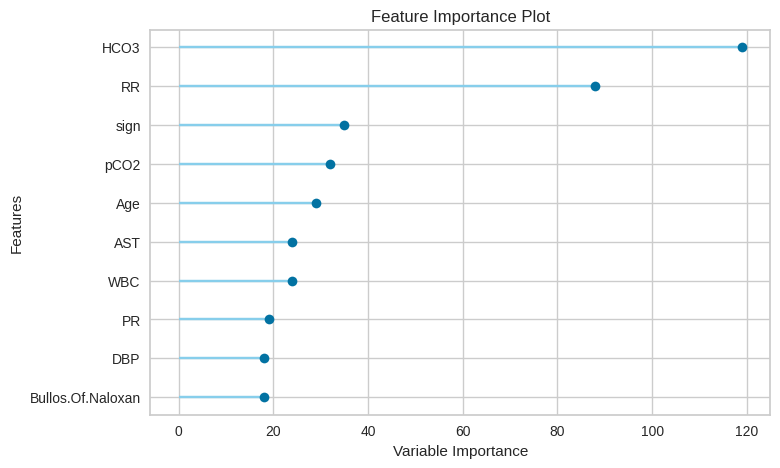

In [ ]:
plot_machine(lightgbm, plot = 'feature')


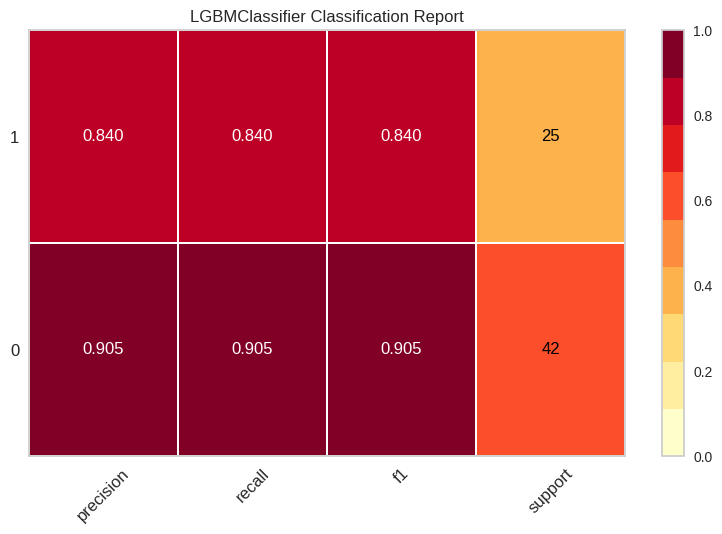

In [ ]:
plot_machine(lightgbm, plot = 'class_report')

# <div style="font-family: Trebuchet MS; background-color: #568203; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Feature selection  💹</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 Recursive Feature Elimination, Cross-Validated (RFECV) feature selection.<br>
    👉 Use Yellowbrick:Machine Learning.  <br>
    👉[Yellowbrick](https://www.scikit-yb.org/en/latest/#) </b>
    
</div>
    

### <div style="font-family: Trebuchet MS; background-color: #A8D35D; color: #FFFFFF; padding: 12px; line-height: 1.5;">Recursive Feature Elimination, Cross-Validated (RFECV) feature selection. Selects the best subset of features for the supplied estimator by removing 0 to N features (where N is the number of features) using recursive feature elimination, then selecting the best subset based on the cross-validation score of the model💻👀</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">

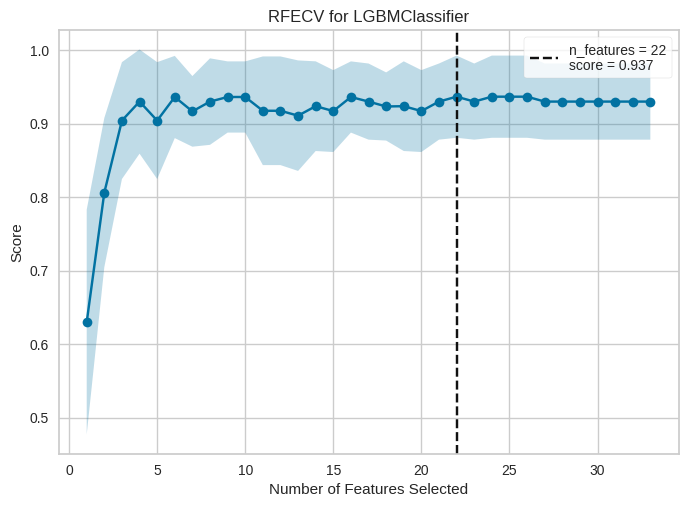

In [ ]:
plot_machine(lightgbm, plot = 'rfe')

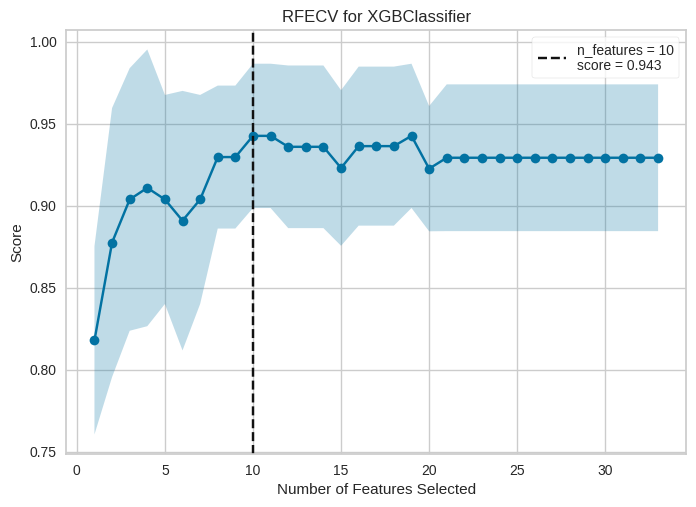

In [ ]:
plot_machine(xgboost, plot = 'rfe')

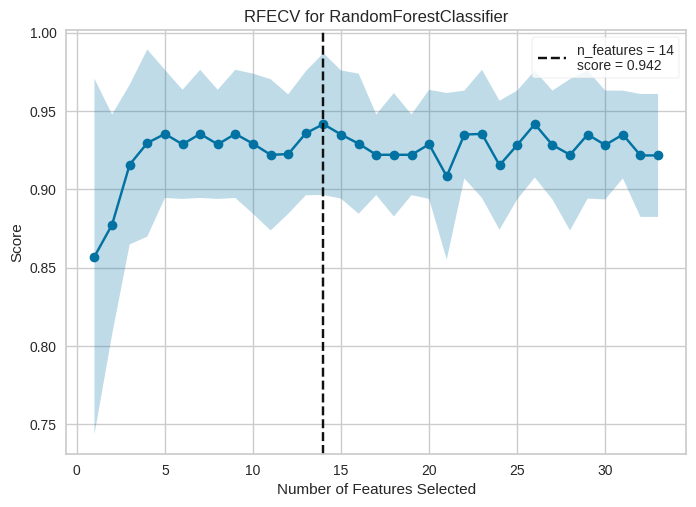

In [ ]:
plot_machine(RanForest, plot = 'rfe')

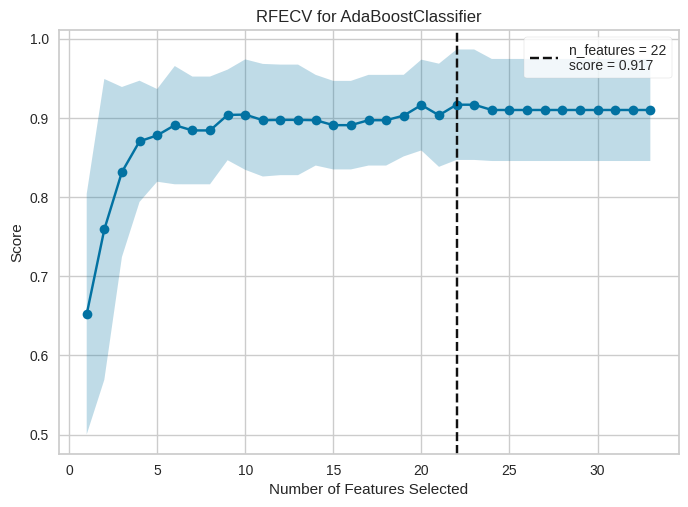

In [ ]:
plot_machine(AdaBo, plot = 'rfe')

# End Stage 1 ----> follow me in stage 2 